In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
results = pd.read_csv("/home/louis/Documents/ConsultationSimpliphAI/AnalytiqueBourassaGit/UncertaintyForecasting/models/LSTM_BayesRegressor/results_n_100_ar5.csv")

In [4]:
print(results.columns)

Index(['Unnamed: 0', 'Confidence_interval_deviance_score',
       'one_sided_deviance_score', 'marginal_deviance_score',
       'correlation_score', 'methods', 'elaspsed_time'],
      dtype='object')


In [5]:
results.groupby("methods").mean()

,Unnamed: 0,Confidence_interval_deviance_score,one_sided_deviance_score,marginal_deviance_score,correlation_score,elaspsed_time
methods,,,,,,
ADVI-Mean-Field,199,0.011005,0.883251,0.058959,0.000048,31.132890
ADVI-full-rank,200,0.010493,0.705719,0.057307,0.000048,37.946279
Hybrid,201,0.009967,0.663673,0.058678,0.000048,99.120616
NUTS,198,0.013017,0.788638,0.055930,0.000048,909.947839


In [15]:
results.head()
results_filtered = results #[results["correlation_score"] <= 0.00006]

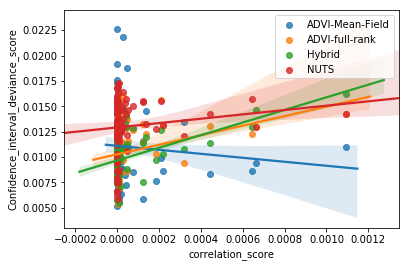

In [16]:
for group, df in results_filtered.groupby("methods"):

    sns.regplot(x="correlation_score", y="Confidence_interval_deviance_score", label=group,data=df)
    plt.legend()

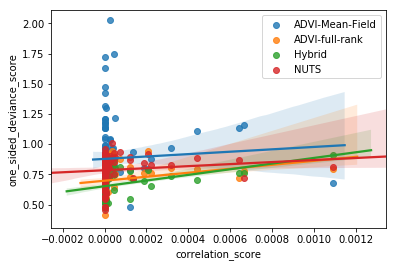

In [22]:
for group, df in results_filtered.groupby("methods"):

    sns.regplot(x="correlation_score", y="one_sided_deviance_score", label=group,data=df)
    plt.legend()

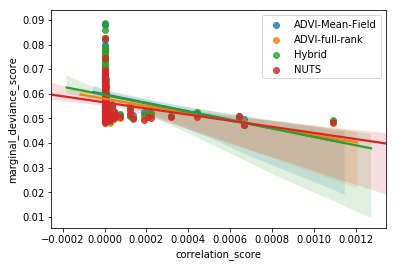

In [23]:
for group, df in results_filtered.groupby("methods"):

    sns.regplot(x="correlation_score", y="marginal_deviance_score", label=group,data=df)
    plt.legend()

In [21]:
for group, df in results_filtered.groupby("methods"):

    print("--------%s-----------"%group)
    print(df.describe())

--------ADVI-Mean-Field-----------
       Unnamed: 0  Confidence_interval_deviance_score  \
count  100.000000                          100.000000   
mean   199.000000                            0.011005   
std    116.045968                            0.003372   
min      1.000000                            0.005196   
25%    100.000000                            0.008637   
50%    199.000000                            0.010568   
75%    298.000000                            0.012437   
max    397.000000                            0.022592   

       one_sided_deviance_score  marginal_deviance_score  correlation_score  \
count                100.000000               100.000000       1.000000e+02   
mean                   0.883251                 0.058959       4.820886e-05   
std                    0.280768                 0.009600       1.529307e-04   
min                    0.478182                 0.047958       5.839850e-09   
25%                    0.712828                 0.051498